In [1]:
import sys
from pathlib import Path

# Add the 'src' directory to the Python path
src_path = Path('../src').resolve()
sys.path.append(str(src_path))


import numpy as np 
import numpy.linalg as LA 
from viewing_direction import *
from utils import *
from aspire.basis.basis_utils import lgwt
from volume import *
import matplotlib.pyplot as plt


j = 5 
alpha = 2 
beta = 3 
gamma = 2

Rot = Rz(alpha) @ Ry(beta) @ Rz(gamma)


Dj = wignerD(j,alpha,beta,gamma)

In [2]:
# should be close to zero 

err = LA.norm(np.eye(2*j+1) - Dj @ np.conj(Dj).T, 'fro')
print(err)

err = LA.norm(np.eye(2*j+1) - np.conj(Dj).T @ Dj , 'fro')
print(err)

1.3619108267767208e-15
1.3616788580309498e-15


In [3]:
# should agree 

lp = norm_assoc_legendre_all(j, np.cos(beta))


for m in range(-j,j+1):
    lpjm = lp[j,abs(m)]*np.exp(-1j*m*alpha)/np.sqrt(2*j+1)

    if m<0:
        lpjm = lpjm*(-1)**m 


    print(Dj[m+j,j],lpjm,abs(lpjm-Dj[m+j,j])/abs(lpjm))


(-2.3296583755296914e-05-1.5104592320554224e-05j) [-2.32965838e-05-1.51045923e-05j] [1.08991754e-14]
(8.96189104547206e-05-0.000609382732023333j) [8.96189105e-05-0.00060938j] [8.36441701e-15]
(0.007803283534917882-0.0022708038217917753j) [0.00780328-0.0022708j] [6.21582898e-15]
(0.04529274927100584+0.052440909042093885j) [0.04529275+0.05244091j] [3.97539876e-15]
(-0.14978683663450806+0.32729020903824096j) [-0.14978684+0.32729021j] [1.34670697e-15]
(-0.8550755669850221+0j) [-0.85507557+0.j] [6.49195853e-16]
(0.14978683663450806+0.32729020903824096j) [0.14978684+0.32729021j] [1.34670697e-15]
(0.04529274927100584-0.052440909042093885j) [0.04529275-0.05244091j] [3.97539876e-15]
(-0.007803283534917882-0.0022708038217917753j) [-0.00780328-0.0022708j] [6.21582898e-15]
(8.96189104547206e-05+0.000609382732023333j) [8.96189105e-05+0.00060938j] [8.36441701e-15]
(2.3296583755296914e-05-1.5104592320554224e-05j) [2.32965838e-05-1.51045923e-05j] [1.08991754e-14]


In [4]:
# generate rotated vectors 

x = np.array([1,2,3])
rx, thx, phx = cart2sph(x[0], x[1], x[2])

y = Rot.T @ x 
ry, thy, phy = cart2sph(y[0], y[1], y[2])


# evaluate rotated spherical harmonics 



lpy = norm_assoc_legendre_all(j, np.cos(thy))
lpx = norm_assoc_legendre_all(j, np.cos(thx))


for m in range(-j,j+1):
    yjm = lpy[j,abs(m)]*np.exp(1j*m*phy)/np.sqrt(4*np.pi)
    if m<0:
        yjm = yjm*(-1)**m 

    _yjm = 0 

    for mp in range(-j,j+1):
        yjmp = lpx[j,abs(mp)]*np.exp(1j*mp*phx)/np.sqrt(4*np.pi)
        if mp<0:
            yjmp = yjmp*(-1)**mp
            
        _yjm += Dj[mp+j,m+j]*yjmp


    print(_yjm,yjm,abs(_yjm-yjm)/abs(yjm))




[-0.06304731+0.00705489j] [-0.06304731+0.00705489j] [2.19178608e-16]
[-0.04937376+0.21571198j] [-0.04937376+0.21571198j] [5.47617935e-16]
[0.34958036+0.21987977j] [0.34958036+0.21987977j] [3.3603915e-16]
[0.2864346-0.22828062j] [0.2864346-0.22828062j] [6.42998724e-16]
[0.02539984+0.07262421j] [0.02539984+0.07262421j] [1.5834412e-15]
[0.38484321-1.56891678e-18j] [0.38484321+0.j] [4.07676873e-18]
[-0.02539984+0.07262421j] [-0.02539984+0.07262421j] [1.89663744e-15]
[0.2864346+0.22828062j] [0.2864346+0.22828062j] [7.57781263e-16]
[-0.34958036+0.21987977j] [-0.34958036+0.21987977j] [3.3603915e-16]
[-0.04937376-0.21571198j] [-0.04937376-0.21571198j] [5.1714484e-16]
[0.06304731+0.00705489j] [0.06304731+0.00705489j] [2.19178608e-16]


In [5]:
# test wigner-D transform 

ell_max = 4 
j = 4
mp = 1
m = -2 


def my_fun(alpha,beta,gamma):
    Dj = wignerD(j,alpha,beta,gamma)
    return (1+3j)*Dj[mp+j,m+j]


coef, indices = wignerD_transform(my_fun, ell_max)


# print(coef)
print(coef[indices[j,mp,m]])
print(np.sort(abs(coef)))


(1.000000170530571+3.0000005115916695j)
[1.34827638e-18 2.13541467e-18 2.67658123e-18 3.26089414e-18
 3.28410950e-18 3.42471584e-18 4.00873634e-18 4.64300660e-18
 4.81245413e-18 5.09002614e-18 5.17267309e-18 5.51470338e-18
 6.03708423e-18 6.25787116e-18 6.76971454e-18 7.16943816e-18
 7.41942926e-18 7.92240063e-18 8.01984464e-18 8.31988765e-18
 8.65826455e-18 8.68077533e-18 9.13694216e-18 9.16131004e-18
 9.28970356e-18 9.39342673e-18 9.57216490e-18 9.77337225e-18
 9.85157800e-18 1.00416962e-17 1.01894209e-17 1.05567617e-17
 1.06951081e-17 1.08389466e-17 1.11802317e-17 1.12256275e-17
 1.13884027e-17 1.16978746e-17 1.17089077e-17 1.19298521e-17
 1.20540231e-17 1.23289120e-17 1.27746857e-17 1.31234447e-17
 1.32165154e-17 1.36085531e-17 1.38725070e-17 1.39128961e-17
 1.43082996e-17 1.44181708e-17 1.48883790e-17 1.49065296e-17
 1.52523217e-17 1.52760263e-17 1.53893169e-17 1.55469561e-17
 1.56395930e-17 1.58511680e-17 1.61622427e-17 1.64997433e-17
 1.66042894e-17 1.66479934e-17 1.67487140e-17

In [6]:
# test sph harm transform 


ell_max = 4 
j = 4
m = -1 
def my_fun(th,ph):
    lpall = norm_assoc_legendre_all(j,np.cos(th))
    lpall /= np.sqrt(4*np.pi)
    if m<0:
        lpall = lpall*(-1)**m
    exp_m = np.exp(1j*m*ph)
    return (0.3+0.5*1j)*lpall[j,abs(m),:]*exp_m


coef, indices = sph_harm_transform(my_fun, ell_max)

# print(coef)
print(coef[indices[j,m]])
print(np.sort(abs(coef)))


(0.299999994105715+0.4999999901761916j)
[2.21134721e-18 2.42434976e-18 3.12731722e-18 3.57622406e-18
 4.07406188e-18 4.33680869e-18 5.27156724e-18 5.48567729e-18
 5.48567729e-18 6.25557407e-18 6.37746851e-18 7.99668010e-18
 9.05552240e-18 1.04309039e-17 1.15720489e-17 1.27549370e-17
 1.71742552e-17 4.86032247e-17 5.33709463e-17 5.88912433e-17
 7.91155631e-17 3.61813120e-08 5.00402991e-08 9.33529779e-08
 5.83095178e-01]


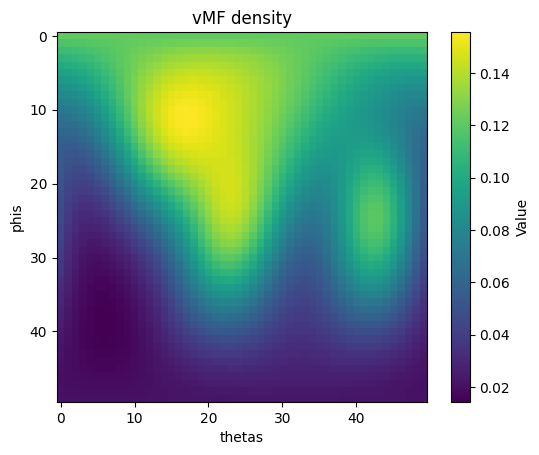

In [7]:
# plot vMF density 

c = 10
centers = np.random.normal(0,1,size=(c,3))
centers /= LA.norm(centers, axis=1, keepdims=True)
w_vmf = np.random.uniform(0,1,c)
w_vmf = w_vmf/np.sum(w_vmf)


ngrid = 50 
_ths = np.pi*np.arange(ngrid)/ngrid
_phs = 2*np.pi*np.arange(ngrid)/ngrid

ths, phs = np.meshgrid(_ths,_phs,indexing='ij')
ths, phs = ths.flatten(), phs.flatten()


# grid = {}
# grid['ths'] = ths
# grid['phs'] = phs 

grid = Grid_3d(type='spherical', ths=ths, phs=phs)


kappa = 3
f_vmf = vMF_density(centers,w_vmf,kappa,grid)
f_vmf = f_vmf.reshape((ngrid,ngrid))

plt.imshow(f_vmf, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [8]:
# test the if the integral over sphere is 1 

xlege, wlege = lgwt(ngrid, -1, 1)
_ths = np.arccos(xlege)

_ths, _phs = np.meshgrid(_ths,_phs,indexing='ij')
_ths, _phs = _ths.flatten(), _phs.flatten()

_wphs = 2*np.pi*np.ones(ngrid)/ngrid

wths, wphs = np.meshgrid(wlege,_wphs,indexing='ij')
wths, wphs = wths.flatten(), wphs.flatten()
wsph = wths*wphs


# _grid = {}
# _grid['ths'] = _ths 
# _grid['phs'] = _phs 
_grid = Grid_3d(type='spherical', ths=_ths, phs=_phs)


f = vMF_density(centers,w_vmf,kappa,_grid)

np.sum(f*wsph)

0.9999999963267545

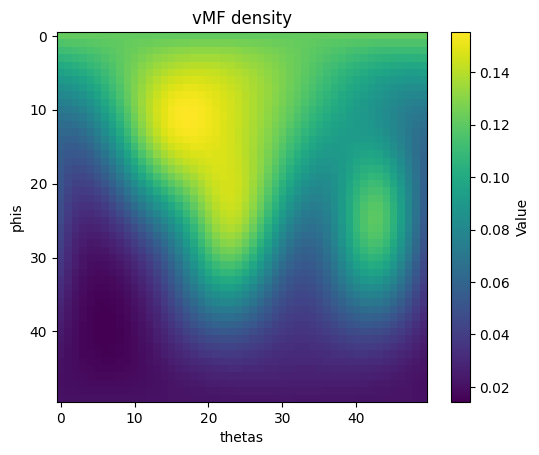

In [9]:
# transform the vMF distribution 


def my_fun(th,ph):
    grid = Grid_3d(type='spherical', ths=np.array([th]),phs=np.array([ph]))
    return vMF_density(centers,w_vmf,kappa,grid)[0]
# my_fun(1,2)

ell_max = 5 
sph_ham_coef, indices = sph_harm_transform(my_fun, ell_max)

f_vmf_expand = sph_ham_coef_eval(sph_ham_coef, indices, ell_max, grid)
f_vmf_expand = np.real(f_vmf_expand.reshape([ngrid, ngrid]))


plt.imshow(f_vmf_expand, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [10]:
LA.norm(f_vmf-f_vmf_expand,'fro')/LA.norm(f_vmf,'fro')

0.0026407012924134286